In [3]:
# This notebook illustrates example outputs from Funman, and how to work with the ParameterSpace object it creates.

# The file scratch/hackathon/hackathon_fall_2023_demo_terarrium.py was used to generate the outputs rendered here.

SAVED_RESULTS_DIR = "./out"

# Import funman related code
import os
from funman.api.run import Runner
from funman_demo import summarize_results
from funman_demo.example.pde import plot_spatial_timeseries
from IPython.display import HTML
import matplotlib.pyplot as plt
import itertools
from funman import FunmanWorkRequest
import json
from funman.representation.constraint import LinearConstraint, ParameterConstraint, StateVariableConstraint
from funman.representation import Interval
from funman import FUNMANConfig
import logging
from funman_demo import summarize_results



RESOURCES = "../resources"
EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet", "terrarium-tests")
MODEL_PATH = os.path.join(
    EXAMPLE_DIR,"seird.json"
)
REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "seird_request.json"
)


# %load_ext autoreload
# %autoreload 2

2024-02-21 02:17:08,752 - funman.server.worker - INFO - FunmanWorker running...
2024-02-21 02:17:08,762 - funman.server.worker - INFO - Starting work on: 7023b460-8603-4c03-9158-8f82f036a1f3


2024-02-21 02:17:16,221 - funman.api.run - INFO - Dumping results to ./out/7023b460-8603-4c03-9158-8f82f036a1f3.json
2024-02-21 02:17:16,250 - funman.scenario.consistency - INFO - 15{150}:	[+]
2024-02-21 02:17:16,257 - funman.server.worker - INFO - Completed work on: 7023b460-8603-4c03-9158-8f82f036a1f3
2024-02-21 02:17:26,268 - funman.server.worker - INFO - Worker.stop() acquiring state lock ....
2024-02-21 02:17:26,767 - funman.server.worker - INFO - FunmanWorker exiting...
2024-02-21 02:17:26,771 - funman.server.worker - INFO - Worker.stop() completed.


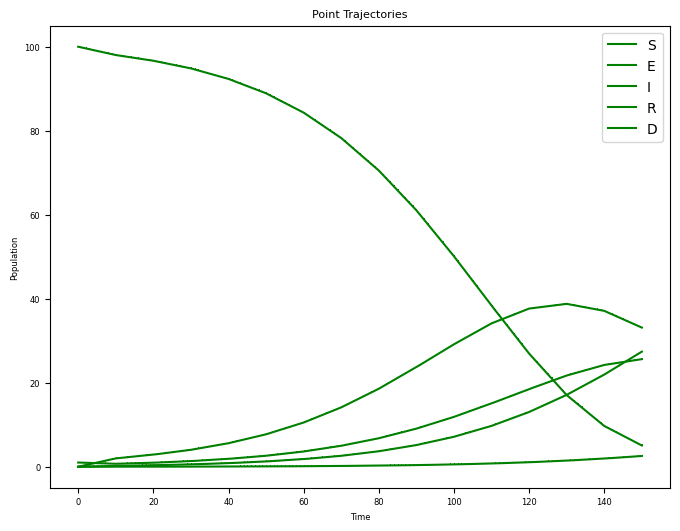

********************************************************************************
********************************************************************************
* Analysis Summary
********************************************************************************
1 Points (+:1, -:0), 1 Boxes (+:1, -:0)
Parameters = {S0[100.0, 100.0): 100.0, I0[1.0, 1.0): 1.0, E0[0.0, 0.0): 0.0, R0[0.0, 0.0): 0.0, H0[0.0, 0.0): 0.0, D0[0.0, 0.0): 0.0, N[101.0, 101.0): 101.0, beta[0.2, 0.2): 0.2, r_E_to_I[0, 1.0): 0.023275594935951188, p_I_to_R[0.2, 0.2): 0.2, r_I_to_R[0.1, 0.1): 0.1, p_I_to_H[0.1, 0.1): 0.1, r_I_to_H[0.1, 0.1): 0.1, p_H_to_R[0.1, 0.1): 0.1, r_H_to_R[0.1, 0.1): 0.1, p_H_to_D[0.1, 0.1): 0.1, r_H_to_D[0.1, 0.1): 0.1}
        # {S0[100.0, 100.0): 100.0, I0[1.0, 1.0): 1.0, E0[0.0, 0.0): 0.0, R0[0.0, 0.0): 0.0, H0[0.0, 0.0): 0.0, D0[0.0, 0.0): 0.0, N[101.0, 101.0): 101.0, beta[0.2, 0.2): 0.2, r_E_to_I[0, 1.0): 0.023275594935951188, p_I_to_R[0.2, 0.2): 0.2, r_I_to_R[0.1, 0.1): 0.1, p_I_to_H[0.1,

In [5]:
# Step 0: Unconstrained model, find any parameter assignment

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))

#     funman_request.config.use_compartmental_constraints=False
#     r_H_to_D = funman_request.parameter("r_H_to_D")
#     r_H_to_D.interval.lb = 0
#     r_H_to_D.interval.ub = 1.0

    r_E_to_I = funman_request.parameter("r_E_to_I")
    r_E_to_I.interval.lb = 0
    r_E_to_I.interval.ub = 1.0


    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SEIRD demo",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(["S", "E", "I", "R", "D"], results_unconstrained_point, ylabel="Population")
    print(summary)